<a href="https://colab.research.google.com/github/ucfilho/Vinicius_Air/blob/main/Stastical/kriging_regression_example_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install GPy

In [2]:
import unittest
import numpy as np
import GPy

from sklearn.metrics import r2_score # metrics to evaluate the model r2_score
from sklearn.metrics import mean_absolute_error # metrics to evaluate the model mean absolute error
from sklearn.metrics import mean_squared_error # metrics to evaluate the model mean squared error


In [3]:
# Ceate a dataset of 20 points adding 
# the dependent variable Y has a random uniform noisy
X = np.random.uniform(-3.,3.,(20,1))
Y = np.exp(X) + np.random.randn(20,1)*0.05

In [4]:
# We can choose different kenels including Gaussian and Matenr
# the Matern kern is a generalization of Gaussian kernel
# if you replace the Matern52 by RBF the code will work using Gaussian 
# but in both cases it is necessary to tune the parameters

#kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
kernel = GPy.kern.Matern52(input_dim=1)

In [5]:
# First part we define the model providing the kernel and dataset
m = GPy.models.GPRegression(X,Y,kernel)


In [6]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
Mat52.variance,1.0,+ve,
Mat52.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


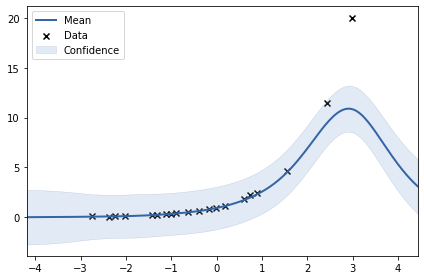

In [7]:
fig = m.plot()
# as observed in fig the stadard deviation without parameters tune are big 
# considering the confidence interval of values estimated

In [8]:
m.optimize(messages=True)
# in order to have a better results the fuction optimize is defined to tune the parameters
# ps: the default method to optimize is 'bfgs' (quasi newton method)

In [9]:
# once the fucntion optimize is defined the parameters of krig can be optimized 
# using optimize_restart
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 12.127310827634538
Optimization restart 2/10, f = 3.3378817653148207
Optimization restart 3/10, f = 3.337881754422849
Optimization restart 4/10, f = 12.127310824350225
Optimization restart 5/10, f = 3.3378817484933982
Optimization restart 6/10, f = 3.3378817535462737
Optimization restart 7/10, f = 3.3378817503219604
Optimization restart 8/10, f = 12.127310825491996
Optimization restart 9/10, f = 12.127310824049658
Optimization restart 10/10, f = 12.12731082475419


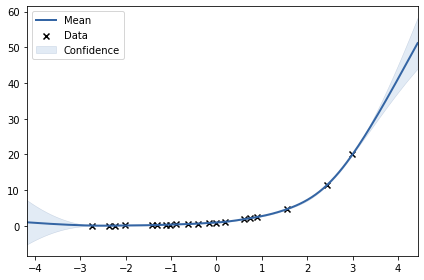

In [10]:
fig = m.plot()
# after optimize we can observe the confidence 
# interval sugest the model is tunned 
# after tune we can observe the confidence interval suggeting values close to experimental 
# in regions where there is experimental points. 

In [11]:
# obtaining the value of y_pred (y_mean) and standard deviation (y_std) for each point
y_mean, y_std = m.predict(X.reshape(-1, 1))

In [12]:
# writing the metrics:
print('r^2 score =',r2_score(Y, y_mean))
print('MAE =',mean_absolute_error(Y, y_mean))
print('MSQE =',mean_squared_error(Y, y_mean))

r^2 score = 0.9999894132879891
MAE = 0.010842788715739706
MSQE = 0.00023971377835094133
